In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt      
matches3 = pd.read_csv('matches3.csv')
matches3

,player_1_h2h,player_2_h2h,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,...,player_1_level_win_pct,player_2_level_win_pct,h2h_diff,recent_form_diff,surface_diff,level_diff,log_player_1_rank,log_player_2_rank,log_rank_ratio,age_diff
0,0.0,0.0,2015-403,Miami Masters,Hard,96,M,2015-03-25,69,6-2 6-2,...,0.750000,0.000000,0.0,0.144570,0.126087,0.126087,1.609438,3.663562,-2.054124,-3.9
1,0.0,1.0,2015-403,Miami Masters,Hard,96,M,2015-03-25,77,6-7 7-6 6-1,...,0.750000,0.800000,-1.0,-0.076719,-0.069231,-0.069231,3.367296,2.197225,1.170071,-7.1
2,1.0,0.0,2015-403,Miami Masters,Hard,96,M,2015-03-25,82,7-6 6-0,...,0.750000,0.600000,1.0,0.289168,0.222222,0.242424,1.945910,2.639057,-0.693147,2.7
3,0.0,0.0,2015-403,Miami Masters,Hard,96,M,2015-03-25,86,6-4 3-6 6-3,...,0.857143,0.500000,0.0,0.215676,0.181818,0.181818,1.386294,2.833213,-1.446919,-1.0
4,0.0,0.0,2015-403,Miami Masters,Hard,96,M,2015-03-25,89,7-5 7-5,...,0.600000,1.000000,0.0,-0.047923,-0.074561,-0.047101,1.945910,0.000000,1.945910,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14324,0.0,0.0,2022-M-DC-2022-WG1-M-ECU-SUI-01,Davis Cup WG1 R1: ECU vs SUI,Hard,4,D,2022-09-17,2,6-4 6-3,...,0.571429,0.450000,0.0,-0.023860,-0.083333,-0.023860,4.718499,4.812184,-0.093685,0.3
14325,0.0,0.0,2022-M-DC-2022-WG1-M-ECU-SUI-01,Davis Cup WG1 R1: ECU vs SUI,Hard,4,D,2022-09-17,4,6-7 6-2 6-2,...,0.600000,0.250000,0.0,-0.023810,-0.121212,-0.023810,4.718499,4.465908,0.252591,4.5
14326,0.0,0.0,2022-M-DC-2022-WG1-M-IND-NOR-01,Davis Cup WG1 R1: IND vs NOR,Hard,4,D,2022-09-16,1,6-1 6-4,...,0.785714,0.222222,0.0,0.652759,0.319688,0.413536,0.693147,5.814131,-5.120983,-9.1
14327,0.0,0.0,2022-M-DC-2022-WG1-M-SVK-ROU-01,Davis Cup WG1 R1: SVK vs ROU,Clay,4,D,2022-09-16,2,7-5 6-1,...,0.000000,0.600000,0.0,0.352880,0.567308,0.152520,3.806662,5.849325,-2.042662,-7.2


In [2]:
# Get unique surface types
surface_types = matches3['surface'].unique()

# Print the unique surface types
print("Number of unique surface types:", len(surface_types))
print("Unique surface types:", surface_types)


Number of unique surface types: 3
Unique surface types: ['Hard' 'Clay' 'Grass']


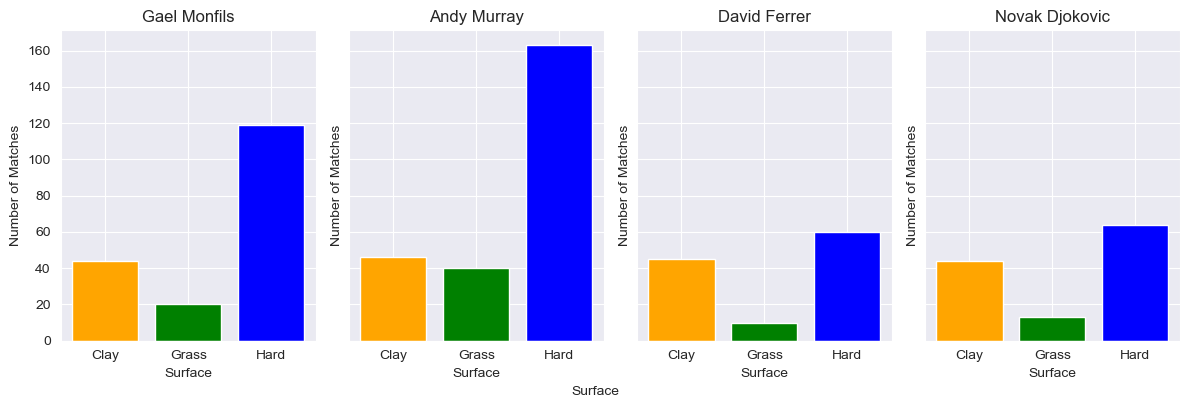

In [3]:
# I create a single row with 4 subplots between the selected players to show their match based on the surface types.
players = ['Gael Monfils', 'Andy Murray', 'David Ferrer', 'Novak Djokovic' ]

filtered_matches = matches3[matches3['player_1_name'].isin(players) | matches3['player_2_name'].isin(players)]
grouped = filtered_matches.groupby(['surface', 'player_1_name']).size().unstack(fill_value=0)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4), sharey=True) 
colors = {'Clay': 'orange', 'Grass': 'green', 'Hard': 'blue'}

# Plot clustered bar chart for each player
for i, player in enumerate(players):
    for surface in grouped.index:
        axes[i].bar(surface, grouped.loc[surface, player], color=colors[surface])
    axes[i].set_xlabel('Surface')
    axes[i].set_ylabel('Number of Matches')
    axes[i].set_title(f'{player}')

fig.text(0.5, 0, 'Surface', ha='center')
plt.tight_layout()
plt.show()

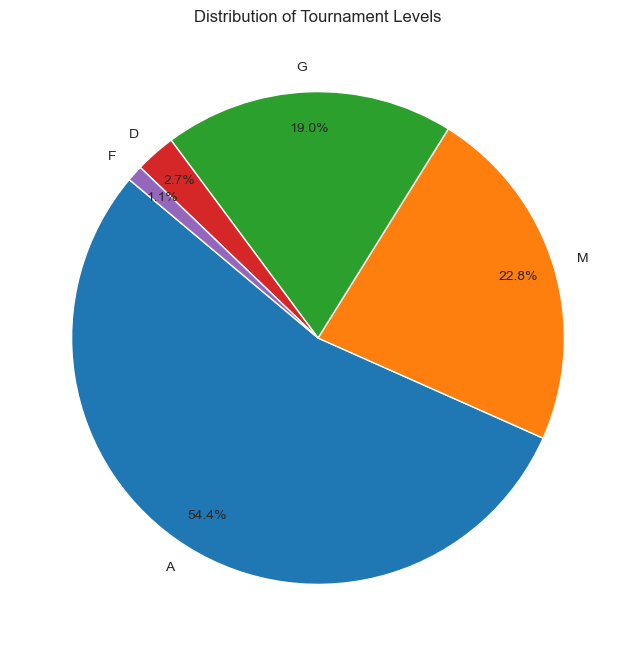

In [4]:
# Count the occurrences of each tourney_level
tourney_level_counts = matches3['tourney_level'].value_counts()

ourney_level_counts = matches3['tourney_level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tourney_level_counts, labels=tourney_level_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Tournament Levels')
plt.show()